In [2]:
path =  '/mnt/data/zhujun/dataset/Youtube/'
from PIL import Image
import os
import numpy as np
import sys
sys.path.append('../')

from benchmarking.video import YoutubeVideo
from benchmarking.utils.model_utils import eval_single_image
from benchmarking.utils.utils import interpolation, compute_f1


In [8]:
import glob
def load_vigil_result(path):
    vigil_perf = {}
    for file in glob.glob(path + 'vigil_e2e_result*.csv'):
        with open(file, 'r') as f:
            f.readline()
            for line in f:
                line_list = line.strip().split(',')
                key = line_list[0]
                bw = float(line_list[1])
                f1 = float(line_list[2])
                vigil_perf[key] = (bw, f1)
    return vigil_perf

In [11]:
vigil_perf = load_vigil_result('./vigil/')


In [15]:
def load_noscope_result(path):
    noscope_perf = {}
    for file in glob.glob(path + 'Noscope_e2e*.csv'):
        if 'with_frame_diff' in file:
            continue
        with open(file, 'r') as f:
            f.readline()
            for line in f:
                line_list = line.strip().split(',')
                key = line_list[0]
                bw = float(line_list[2])
                f1 = float(line_list[3])
                noscope_perf[key] = (bw, f1)                
    return noscope_perf

In [16]:
noscope_perf = load_noscope_result('./noscope/')

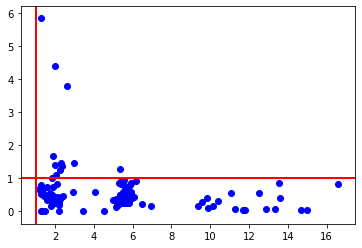

In [26]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)

for key in noscope_perf.keys():
    if key not in vigil_perf:
        print('{} missing'.format(key))
        continue
    if noscope_perf[key][1] == 0 or noscope_perf[key][0] == 0:
        continue
    relative_f1 = vigil_perf[key][1]/noscope_perf[key][1]
    relative_bw = vigil_perf[key][0]/noscope_perf[key][0]
    ax.scatter(relative_bw, relative_f1, c='b')
    ax.axhline(y=1, color='r', linestyle='-')
    ax.axvline(x=1, color='r', linestyle='-')
